In [1]:
import pandas as pd

# Some sklearn tools for preprocessing and building a pipeline. 
# ColumnTransformer was introduced in 0.20 so make sure you have this version
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Data columns (total 29 columns):
age                                     20468 non-null int64
annualincome                            20468 non-null int64
calldroprate                            20468 non-null float64
callfailurerate                         20468 non-null float64
callingnum                              20468 non-null int64
customerid                              20468 non-null int64
customersuspended                       20468 non-null object
education                               20468 non-null object
gender                                  20468 non-null object
homeowner                               20468 non-null object
maritalstatus                           20468 non-null object
monthlybilledamount                     20468 non-null int64
noadditionallines                       20468 non-null object
numberofcomplaints                      20468 non-null int64
numberofmonthunpaid        

In [4]:
df.head()

age  annualincome  calldroprate  callfailurerate  callingnum  customerid  \
0   12        168147          0.06             0.00  4251078442           1   
1   12        168147          0.06             0.00  4251078442           1   
2   42         29047          0.05             0.01  4251043419           2   
3   42         29047          0.05             0.01  4251043419           2   
4   58         27076          0.07             0.02  4251055773           3   

  customersuspended               education  gender homeowner  ...  \
0               Yes  Bachelor or equivalent    Male       Yes  ...   
1               Yes  Bachelor or equivalent    Male       Yes  ...   
2               Yes  Bachelor or equivalent  Female       Yes  ...   
3               Yes  Bachelor or equivalent  Female       Yes  ...   
4               Yes    Master or equivalent  Female       Yes  ...   

  totalminsusedinlastmonth  unpaidbalance usesinternetservice  \
0                       15             19                  No   
1                       15             19                  No   
2                      212             34                  No   
3                      212             34                  No   
4                      216            144                  No   

   usesvoiceservice  percentagecalloutsidenetwork  totalcallduration  \
0                No                          0.82               5971   
1                No                          0.82               3981   
2               Yes                          0.27               7379   
3               Yes                          0.27               1729   
4                No                          0.48               3122   

  avgcallduration  churn  year  month  
0             663      0  2015      1  
1             995      0  2015      2  
2             737      0  2015      1  
3             432      0  2015      2  
4             624      0  2015      1  

[5 rows x 29 columns]

In [5]:
df = df.drop(['year','callingnum', 'noadditionallines'], axis = 1)

In [6]:
#df = df.replace('Yes', 1).replace('No', 0).replace('Male', 1).replace('Female', 0).replace('Single', 0).replace('Married', 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Data columns (total 26 columns):
age                                     20468 non-null int64
annualincome                            20468 non-null int64
calldroprate                            20468 non-null float64
callfailurerate                         20468 non-null float64
customerid                              20468 non-null int64
customersuspended                       20468 non-null object
education                               20468 non-null object
gender                                  20468 non-null object
homeowner                               20468 non-null object
maritalstatus                           20468 non-null object
monthlybilledamount                     20468 non-null int64
numberofcomplaints                      20468 non-null int64
numberofmonthunpaid                     20468 non-null int64
numdayscontractequipmentplanexpiring    20468 non-null int64
occupation                  

In [8]:
df.head()

age  annualincome  calldroprate  callfailurerate  customerid  \
0   12        168147          0.06             0.00           1   
1   12        168147          0.06             0.00           1   
2   42         29047          0.05             0.01           2   
3   42         29047          0.05             0.01           2   
4   58         27076          0.07             0.02           3   

  customersuspended               education  gender homeowner maritalstatus  \
0               Yes  Bachelor or equivalent    Male       Yes        Single   
1               Yes  Bachelor or equivalent    Male       Yes        Single   
2               Yes  Bachelor or equivalent  Female       Yes        Single   
3               Yes  Bachelor or equivalent  Female       Yes        Single   
4               Yes    Master or equivalent  Female       Yes        Single   

   ...  state  totalminsusedinlastmonth  unpaidbalance  usesinternetservice  \
0  ...     WA                        15             19                   No   
1  ...     WA                        15             19                   No   
2  ...     WI                       212             34                   No   
3  ...     WI                       212             34                   No   
4  ...     KS                       216            144                   No   

  usesvoiceservice  percentagecalloutsidenetwork totalcallduration  \
0               No                          0.82              5971   
1               No                          0.82              3981   
2              Yes                          0.27              7379   
3              Yes                          0.27              1729   
4               No                          0.48              3122   

   avgcallduration  churn month  
0              663      0     1  
1              995      0     2  
2              737      0     1  
3              432      0     2  
4              624      0     1  

[5 rows x 26 columns]

In [9]:
df['penaltytoswitch']

0        371
1        371
2         43
3         43
4        403
        ... 
20463    395
20464    255
20465    255
20466    432
20467    432
Name: penaltytoswitch, Length: 20468, dtype: int64

In [10]:
num_features = ['age','annualincome','calldroprate','callfailurerate','monthlybilledamount','numberofcomplaints','numberofmonthunpaid', 'numdayscontractequipmentplanexpiring', 'penaltytoswitch', 'totalminsusedinlastmonth', 'unpaidbalance', 'percentagecalloutsidenetwork', 'totalcallduration', 'avgcallduration', 'month']
cat_features = ['customersuspended', 'education','gender', 'homeowner', 'maritalstatus','occupation', 'usesinternetservice', 'usesvoiceservice']


In [11]:
y=df['churn']
X = df.drop(['churn', 'customerid', 'state'], axis = 1)

In [12]:
preprocessor = ColumnTransformer([("numerical", "passthrough", num_features), 
                                  #passing numerical features no need for analysis right now
                                  ("categorical", OneHotEncoder(sparse=False, handle_unknown="ignore"),
                                   cat_features)])

In [13]:
# Logistic Regression
lr_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42))])

# Decision Tree
dt_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", DecisionTreeClassifier(class_weight="balanced"))])

# Random Forest
rf_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1))])

# XGBoost
xgb_model = Pipeline([("preprocessor", preprocessor), 
                      # Add a scale_pos_weight to make it balanced
                      ("model", XGBClassifier(scale_pos_weight=(1 - y.mean()), n_jobs=-1))])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=42)

In [15]:
gs = GridSearchCV(lr_model, {"model__C": [1, 1.3, 1.5]}, n_jobs=-1, cv=5, scoring="accuracy")


In [16]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'annualincome',
                                                                          'calldroprate',
                                                                          'callfailurerate',
        

In [17]:
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1.5}
0.6104557827877434


In [18]:
lr_model.set_params(**gs.best_params_)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age', 'annualincome',
                                                   'calldroprate',
                                                   'callfailurerate',
                                                   'monthlybilledamount',
                                                   'numberofcomplaints',
                                                   'numberofmonthunpaid',
                                                   'numdayscontractequipmentplanexpiring',
                                                   'penaltytoswi...
                                                   'homeowner', 'maritalstatus',
           

In [19]:
lr_model.get_params("model")

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('numerical', 'passthrough',
                                    ['age', 'annualincome', 'calldroprate',
                                     'callfailurerate', 'monthlybilledamount',
                                     'numberofcomplaints', 'numberofmonthunpaid',
                                     'numdayscontractequipmentplanexpiring',
                                     'penaltytoswitch', 'totalminsusedinlastmonth',
                                     'unpaidbalan...
                                     'totalcallduration', 'avgcallduration',
                                     'month']),
                                   ('categorical',
                                    OneHotEncoder(categorical_features=None,
                                                  categories=None,

In [20]:
lr_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age', 'annualincome',
                                                   'calldroprate',
                                                   'callfailurerate',
                                                   'monthlybilledamount',
                                                   'numberofcomplaints',
                                                   'numberofmonthunpaid',
                                                   'numdayscontractequipmentplanexpiring',
                                                   'penaltytoswi...
                                                   'homeowner', 'maritalstatus',
           

In [21]:
y_pred = lr_model.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.606415893177007

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.60      0.74      5582
           1       0.14      0.62      0.22       559

    accuracy                           0.61      6141
   macro avg       0.54      0.61      0.48      6141
weighted avg       0.87      0.61      0.69      6141



In [24]:
import eli5
eli5.show_weights(lr_model.named_steps["model"])

e:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.
e:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type

In [25]:
preprocessor = lr_model.named_steps["preprocessor"]

In [26]:
ohe_categories = preprocessor.named_transformers_["categorical"].categories_

In [27]:
new_ohe_features = [f"{col}__{val}" for col, vals in zip(cat_features, ohe_categories) for val in vals]

In [28]:
all_features = num_features + new_ohe_features

In [29]:
pd.DataFrame(lr_model.named_steps["preprocessor"].transform(X_train), columns=all_features).head()

age  annualincome  calldroprate  callfailurerate  monthlybilledamount  \
0  14.0      202165.0          0.03             0.02                 88.0   
1  28.0      229400.0          0.03             0.00                112.0   
2  62.0      169601.0          0.02             0.03                 12.0   
3  73.0      189566.0          0.00             0.03                 27.0   
4  64.0      216219.0          0.04             0.01                  5.0   

   numberofcomplaints  numberofmonthunpaid  \
0                 0.0                  0.0   
1                 2.0                  4.0   
2                 3.0                  3.0   
3                 0.0                  1.0   
4                 2.0                  2.0   

   numdayscontractequipmentplanexpiring  penaltytoswitch  \
0                                  60.0             88.0   
1                                  26.0            454.0   
2                                  37.0            411.0   
3                                  70.0              3.0   
4                                  69.0            173.0   

   totalminsusedinlastmonth  ...  homeowner__Yes  maritalstatus__Married  \
0                     455.0  ...             1.0                     1.0   
1                      59.0  ...             1.0                     0.0   
2                     403.0  ...             1.0                     0.0   
3                     396.0  ...             0.0                     0.0   
4                     123.0  ...             1.0                     1.0   

   maritalstatus__Single  occupation__Non-technology Related Job  \
0                    0.0                                     0.0   
1                    1.0                                     1.0   
2                    1.0                                     0.0   
3                    1.0                                     0.0   
4                    0.0                                     0.0   

   occupation__Others  occupation__Technology Related Job  \
0                 0.0                                 1.0   
1                 0.0                                 0.0   
2                 1.0                                 0.0   
3                 1.0                                 0.0   
4                 1.0                                 0.0   

   usesinternetservice__No  usesinternetservice__Yes  usesvoiceservice__No  \
0                      1.0                       0.0                   1.0   
1                      1.0                       0.0                   1.0   
2                      1.0                       0.0                   1.0   
3                      1.0                       0.0                   1.0   
4                      1.0                       0.0                   1.0   

   usesvoiceservice__Yes  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  

[5 rows x 34 columns]

In [30]:
eli5.show_weights(lr_model.named_steps["model"], feature_names=all_features)

In [31]:
i = 4
X_test.iloc[[i]]

age  annualincome  calldroprate  callfailurerate customersuspended  \
1056   36        192941           0.0             0.02               Yes   

                 education  gender homeowner maritalstatus  \
1056  High School or below  Female        No        Single   

      monthlybilledamount  ...  occupation  penaltytoswitch  \
1056                   90  ...      Others              458   

      totalminsusedinlastmonth unpaidbalance  usesinternetservice  \
1056                       289           174                   No   

      usesvoiceservice  percentagecalloutsidenetwork totalcallduration  \
1056                No                          0.45              3556   

     avgcallduration  month  
1056             711      1  

[1 rows x 23 columns]

In [32]:
y_test.iloc[i]

0

In [33]:
eli5.show_prediction(lr_model.named_steps["model"], 
                     lr_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)

with a Decision Tree
eli5 can also be used to intepret decision trees:

In [34]:
gs = GridSearchCV(dt_model, {"model__max_depth": [3, 5, 7], 
                             "model__min_samples_split": [2, 5]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'annualincome',
                                                                          'calldroprate',
                                                                          'callfailurerate',
        

In [35]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 7, 'model__min_samples_split': 2}
0.549033293780973


In [36]:
dt_model.set_params(**gs.best_params_)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age', 'annualincome',
                                                   'calldroprate',
                                                   'callfailurerate',
                                                   'monthlybilledamount',
                                                   'numberofcomplaints',
                                                   'numberofmonthunpaid',
                                                   'numdayscontractequipmentplanexpiring',
                                                   'penaltytoswi...
                                                   'usesinternetservice',
                  

In [37]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.5464907995440482

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.51      0.67      5582
           1       0.16      0.94      0.27       559

    accuracy                           0.55      6141
   macro avg       0.58      0.73      0.47      6141
weighted avg       0.91      0.55      0.63      6141



In [40]:
eli5.show_weights(dt_model.named_steps["model"], feature_names=all_features)

In [41]:
eli5.show_prediction(dt_model.named_steps["model"], 
                     dt_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)

Here the explanation for a single prediction is calculated by following the decision path in the tree, and adding up contribution of each feature from each node crossed into the overall probability predicted.

eli5 can also be used to explain black box models, but we will use Lime and SHAP for our two last models instead.

LIME to generate local intepretations of black box models
LIME stands for Local Interpretable Model-Agnostic Explanations. We can use it with any model we've built in order to explain why it took a specific decision for a given observation. To do so, LIME creates a dataset in the locality of our observation by perturbating the different features. Then it fits a local linear model on this data and uses the weights on each feature to provide an explanation.

with a Random Forest

In [42]:
gs = GridSearchCV(rf_model, {"model__max_depth": [10, 15], 
                             "model__min_samples_split": [5, 10]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'annualincome',
                                                                          'calldroprate',
                                                                          'callfailurerate',
        

In [43]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 15, 'model__min_samples_split': 5}
0.9372513436169471


In [44]:
rf_model.set_params(**gs.best_params_)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age', 'annualincome',
                                                   'calldroprate',
                                                   'callfailurerate',
                                                   'monthlybilledamount',
                                                   'numberofcomplaints',
                                                   'numberofmonthunpaid',
                                                   'numdayscontractequipmentplanexpiring',
                                                   'penaltytoswi...
                 RandomForestClassifier(bootstrap=True, class_weight='balanced',
           

In [45]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.9460999837160071

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5582
           1       0.97      0.42      0.59       559

    accuracy                           0.95      6141
   macro avg       0.96      0.71      0.78      6141
weighted avg       0.95      0.95      0.94      6141



In [48]:
eli5.show_weights(rf_model.named_steps["model"], 
                  feature_names=all_features)

Let's train our XGB model as well

In [49]:
gs = GridSearchCV(xgb_model, {"model__max_depth": [5, 10],
                              "model__min_child_weight": [5, 10],
                              "model__n_estimators": [25]},
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'annualincome',
                                                                          'calldroprate',
                                                                          'callfailurerate',
        

In [50]:
print(gs.best_params_)
print(gs.best_score_)
xgb_model.set_params(**gs.best_params_)
xgb_model.fit(X_train, y_train)

{'model__max_depth': 10, 'model__min_child_weight': 5, 'model__n_estimators': 25}
0.9098904166957493


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age', 'annualincome',
                                                   'calldroprate',
                                                   'callfailurerate',
                                                   'monthlybilledamount',
                                                   'numberofcomplaints',
                                                   'numberofmonthunpaid',
                                                   'numdayscontractequipmentplanexpiring',
                                                   'penaltytoswi...
                               colsample_bylevel=1, colsample_bynode=1,
                    

In [51]:
y_pred = xgb_model.predict(X_test)

In [52]:
accuracy_score(y_test, y_pred)

0.9099495196222114

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5582
           1       1.00      0.01      0.02       559

    accuracy                           0.91      6141
   macro avg       0.95      0.51      0.49      6141
weighted avg       0.92      0.91      0.87      6141



In [88]:
eli5.show_weights(xgb_model.named_steps["model"], 
                  feature_names=all_features)

Create an explainer
In order to explain why the model classifies invidividual observations as class 0 or 1, we are going to use the LimeTabularExplainer from the library lime, this is the main explainer to use for tabular data. Lime also provides an explainer for text data, for images and for time-series.

When using the tabular explainer, we need to provide our training set as parameter so that lime can compute statistics on each feature, either mean and std for numerical features, or frequency of values for categorical features. Those statistics are used to scale the data and generate new perturbated data to train our local linear models on.

In [54]:
from lime.lime_tabular import LimeTabularExplainer

The parameters passed to the explainer are:
- our training set, we need to make sure we use the training set *without* one hot encoding
- `mode`: the explainer can be used for classification or regression
- `feature_names`: list of labels for our features
- `categorical_features`: list of indexes of categorical features
- `categorical_names`: dict mapping each index of categorical feature to a list of corresponding labels
- `dicretize_continuous`: will discretize numerical values into buckets that can be used for explanation. For instance it can tell us that the decision was made because distance is in bucket [5km, 10km] instead of telling us distance is an importante feature.

First, in order to get the categorical_names parameter we need to build a dictionary with indexes of categorical values in original dataset as keys and lists of possible categories as values:

In [55]:
categorical_names = {}
for col in cat_features:
    categorical_names[X_train.columns.get_loc(col)] = [new_col.split("__")[1] 
                                                       for new_col in new_ohe_features 
                                                       if new_col.split("__")[0] == col]

In [56]:
categorical_names

{4: ['No', 'Yes'],
 5: ['Bachelor or equivalent',
  'High School or below',
  'Master or equivalent',
  'PhD or equivalent'],
 6: ['Female', 'Male'],
 7: ['No', 'Yes'],
 8: ['Married', 'Single'],
 13: ['Non-technology Related Job', 'Others', 'Technology Related Job'],
 17: ['No', 'Yes'],
 18: ['No', 'Yes']}

Lime needs the dataset that is passed to have categorical values converted to integer labels that maps to the values in categorical_names.  That function is going over all categorical features and replacing strings by the correct integer labels.

In [57]:
def convert_to_lime_format(X, categorical_names, col_names=None, invert=False):
    """Converts data with categorical values as string into the right format 
    for LIME, with categorical values as integers labels.

    It takes categorical_names, the same dictionary that has to be passed
    to LIME to ensure consistency. 

    col_names and invert allow to rebuild the original dataFrame from
    a numpy array in LIME format to be passed to a Pipeline or sklearn
    OneHotEncoder
    """

    # If the data isn't a dataframe, we need to be able to build it
    if not isinstance(X, pd.DataFrame):
        X_lime = pd.DataFrame(X, columns=col_names)
    else:
        X_lime = X.copy()

    for k, v in categorical_names.items():
        if not invert:
            label_map = {
                str_label: int_label for int_label, str_label in enumerate(v)
            }
        else:
            label_map = {
                int_label: str_label for int_label, str_label in enumerate(v)
            }

        X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)

    return X_lime

In [58]:
convert_to_lime_format(X_train, categorical_names).head()

age  annualincome  calldroprate  callfailurerate  customersuspended  \
4821    14        202165          0.03             0.02                  1   
15343   28        229400          0.03             0.00                  1   
11237   62        169601          0.02             0.03                  1   
9676    73        189566          0.00             0.03                  1   
10115   64        216219          0.04             0.01                  1   

       education  gender  homeowner  maritalstatus  monthlybilledamount  ...  \
4821           2       1          1              0                   88  ...   
15343          0       0          1              1                  112  ...   
11237          0       0          1              1                   12  ...   
9676           3       1          0              1                   27  ...   
10115          1       0          1              0                    5  ...   

       occupation  penaltytoswitch  totalminsusedinlastmonth  unpaidbalance  \
4821            2               88                       455            190   
15343           0              454                        59            232   
11237           1              411                       403             49   
9676            1                3                       396             97   
10115           1              173                       123            145   

       usesinternetservice  usesvoiceservice  percentagecalloutsidenetwork  \
4821                     0                 0                          0.01   
15343                    0                 0                          0.12   
11237                    0                 0                          0.09   
9676                     0                 0                          0.09   
10115                    0                 0                          0.12   

       totalcallduration  avgcallduration  month  
4821                5855              836      1  
15343               3291              658      1  
11237               2252             1126      1  
9676                5073              845      2  
10115               1821              455      2  

[5 rows x 23 columns]

In [59]:
convert_to_lime_format(X_train, categorical_names).head()

age  annualincome  calldroprate  callfailurerate  customersuspended  \
4821    14        202165          0.03             0.02                  1   
15343   28        229400          0.03             0.00                  1   
11237   62        169601          0.02             0.03                  1   
9676    73        189566          0.00             0.03                  1   
10115   64        216219          0.04             0.01                  1   

       education  gender  homeowner  maritalstatus  monthlybilledamount  ...  \
4821           2       1          1              0                   88  ...   
15343          0       0          1              1                  112  ...   
11237          0       0          1              1                   12  ...   
9676           3       1          0              1                   27  ...   
10115          1       0          1              0                    5  ...   

       occupation  penaltytoswitch  totalminsusedinlastmonth  unpaidbalance  \
4821            2               88                       455            190   
15343           0              454                        59            232   
11237           1              411                       403             49   
9676            1                3                       396             97   
10115           1              173                       123            145   

       usesinternetservice  usesvoiceservice  percentagecalloutsidenetwork  \
4821                     0                 0                          0.01   
15343                    0                 0                          0.12   
11237                    0                 0                          0.09   
9676                     0                 0                          0.09   
10115                    0                 0                          0.12   

       totalcallduration  avgcallduration  month  
4821                5855              836      1  
15343               3291              658      1  
11237               2252             1126      1  
9676                5073              845      2  
10115               1821              455      2  

[5 rows x 23 columns]

In [60]:
explainer = LimeTabularExplainer(convert_to_lime_format(X_train, categorical_names).values,
                                 mode="classification",
                                 feature_names=X_train.columns.tolist(),
                                 categorical_names=categorical_names,
                                 categorical_features=categorical_names.keys(),
                                 discretize_continuous=True,
                                 random_state=42)

Great, our explainer is ready. Now let's pick an observation we want to explain.

We'll create a variable called `observation` that contains our ith observation in the test dataset.

In [61]:
i = 2
X_observation = X_test.iloc[[i], :]
X_observation

age  annualincome  calldroprate  callfailurerate customersuspended  \
17739   29        131332          0.01             0.01               Yes   

                  education gender homeowner maritalstatus  \
17739  Master or equivalent   Male       Yes       Married   

       monthlybilledamount  ...  occupation  penaltytoswitch  \
17739                   56  ...      Others               18   

       totalminsusedinlastmonth unpaidbalance  usesinternetservice  \
17739                       393            22                   No   

       usesvoiceservice  percentagecalloutsidenetwork totalcallduration  \
17739               Yes                          0.63              7016   

      avgcallduration  month  
17739            1002      1  

[1 rows x 23 columns]

In [62]:
print(f"""\
* True label: {y_test.iloc[i]}
* LR: {lr_model.predict_proba(X_observation)[0]}
* DT: {dt_model.predict_proba(X_observation)[0]}
* RF: {rf_model.predict_proba(X_observation)[0]}
* XGB: {xgb_model.predict_proba(X_observation)[0]}""")

* True label: 0
* LR: [0.65456126 0.34543874]
* DT: [0.34860661 0.65139339]
* RF: [0.91149669 0.08850331]
* XGB: [0.9121786  0.08782142]


Let's convert our observation to lime format and convert it to a numpy array.

In [63]:
observation = convert_to_lime_format(X_test.iloc[[i], :],categorical_names).values[0]
observation

array([2.90000e+01, 1.31332e+05, 1.00000e-02, 1.00000e-02, 1.00000e+00,
       2.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 5.60000e+01,
       1.00000e+00, 7.00000e+00, 5.00000e+01, 1.00000e+00, 1.80000e+01,
       3.93000e+02, 2.20000e+01, 0.00000e+00, 1.00000e+00, 6.30000e-01,
       7.01600e+03, 1.00200e+03, 1.00000e+00])

In order to explain a prediction, we use the `explain_instance` method on our explainer. This will generate new data with perturbated features around the observation and learn a local linear model. It needs to take:
- our observation as a numpy array
- a function that uses our model to predict probabilities given the data (in same format we've passed in our explainer). That means we cannot pass directly our `rf_model.predict_proba` because our pipeline expects string labels for categorical values. We will need to create a custom function `rf_predict_proba` that first converts back integer labels to strings and then calls `rf_model.predict_proba`.
- `num_features`: number of features to consider in explanation

In [64]:
# Let write a custom predict_proba functions for our models:
from functools import partial

def custom_predict_proba(X, model):
    X_str = convert_to_lime_format(X, categorical_names, col_names=X_train.columns, invert=True)
    return model.predict_proba(X_str)

lr_predict_proba = partial(custom_predict_proba, model=lr_model)
dt_predict_proba = partial(custom_predict_proba, model=dt_model)
rf_predict_proba = partial(custom_predict_proba, model=rf_model)
xgb_predict_proba = partial(custom_predict_proba, model=xgb_model)

Let's test our custom function to make sure it generates propabilities properly

In [65]:
explanation = explainer.explain_instance(observation, lr_predict_proba, num_features=5)

Now that we have generated our explanation, we have access to several representations. The most useful one when working in a notebook is `show_in_notebook`.


On the left it shows the list of probabilities for each class, here the model classified our observation as 0 (non subsribed) with a high probability.
* If you set `show_table=True`, you will see the table with the most important features for this observation on the right.

In [66]:
explanation.show_in_notebook(show_table=True, show_all=False)

In [67]:
 #explanation.save_to_file("explanation.html")

LIME is fitting a linear model on a local perturbated dataset. You can access the coefficients, the intercept and the R squared of the linear model by calling respectively .local_exp, .intercept and .score on your explanation

In [68]:
print(explanation.local_exp)
print(explanation.intercept)
print(explanation.score)

{1: [(16, -0.08555357792834839), (0, 0.07352368899948941), (17, -0.06286655723951416), (5, -0.050328494559382535), (8, -0.04319988171410186)]}
{1: 0.5495280044181159}
0.13707141427321257


If your R-squared is low, the linear model that LIME fitted isn't a great approximation to your model, which means you should not rely too much on the explanation it provides.

In [69]:
explanation = explainer.explain_instance(observation, dt_predict_proba, num_features=5)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.08178646320762406


In [70]:
explanation = explainer.explain_instance(observation, rf_predict_proba, num_features=5)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.12012698886358751


In [71]:
explanation = explainer.explain_instance(observation, xgb_predict_proba, num_features=5)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.09719808525557327


## More local interpretation with SHAP


In [72]:
import shap
# Need to load JS vis in the notebook
shap.initjs() 

SHAP has a generic explainer that works for any model and a TreeExplainer optimised for tree based models. Here we will focus on the TreeExplainer with our XGB model (the hardest to intepret)

In [73]:
explainer = shap.TreeExplainer(xgb_model.named_steps["model"])

In order to compute the shapley values with the tree explainer, we need to call the shap_values methods passing a dataset. That can be quite computationally expensive, so we will only pass 1000 samples picked at random.

In [75]:
observations = xgb_model.named_steps["preprocessor"].transform(X_train.sample(1000, random_state=42))
shap_values = explainer.shap_values(observations)

Now we can start visualising our explanations using the force_plot function from the shap package passing our first shap_value (we also need to pass explainer.expected_value which is the base value).

In [76]:
i = 0
shap.force_plot(explainer.expected_value, shap_values[i], 
                features=observations[i], feature_names=all_features)

This explanation shows how each feature contributes to shifting the prediction from the base value to the output value of the model either by decreasing or increasing the probability of our class.

We can also visualise all points in our dataset at once with a given class by passing all explanations for that class to `force_plot`

In [77]:
shap.force_plot(explainer.expected_value, shap_values,
                features=observations, feature_names=all_features)

We can see our 1000 samples on the x axis. The y-axis corresponds to the same scale we were looking at before, where blue values corresponds to the probability decreasing, red increasing. Hover with your mouse on a point to see the main features impacting a given observation. You can also use the drop down on the left to visualise the impact of specific features, for example duration only.

Another interesting plot that we can generate with SHAP is the `summary_plot`, it can be seen as a feature importance plot with more meaningful insights. Below we're plotting the summary plot for class 1 on the whole subset.
The colour corresponds to the value of the feature and the x axis corresponds to the SHAP value, meaning the impact on the probability. 

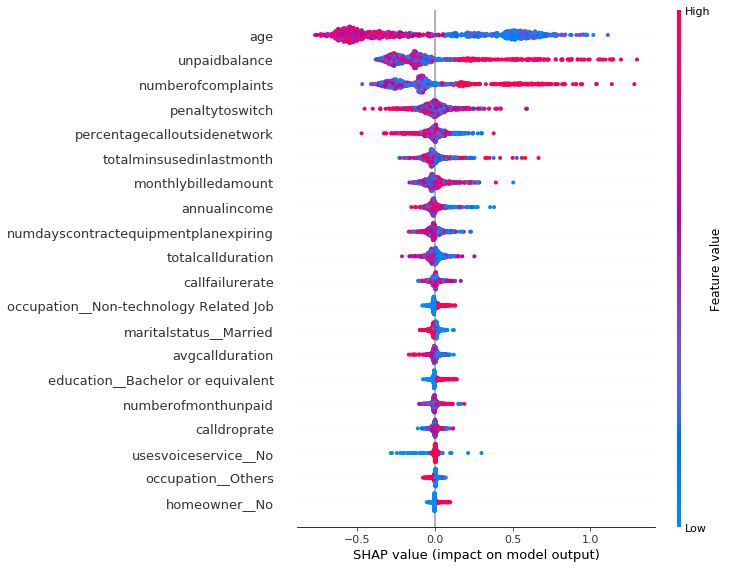

In [78]:
shap.summary_plot(shap_values, features=observations, feature_names=all_features)

That's better than the built-in feature importance on RandomForest because not only we can see what features are important but also how they affect our predictions.

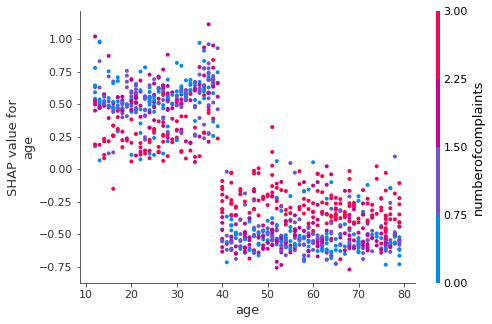

In [83]:
shap.dependence_plot("age", shap_values, 
                     pd.DataFrame(observations, columns=all_features))